__MADELON Data Set__

In [30]:
# Importing libraries

import urllib.request as urllib2
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import svm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

In [31]:
# Importing the data set

train_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.data'
val_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_valid.data'
train_resp_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.labels'
val_resp_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/madelon_valid.labels'
test_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_test.data'
x_train = np.loadtxt(urllib2.urlopen(train_data_url))
y_train = np.loadtxt(urllib2.urlopen(train_resp_url))
x_val = np.loadtxt(urllib2.urlopen(val_data_url))
y_val = np.loadtxt(urllib2.urlopen(val_resp_url))

In [32]:
# Feature Scaling

scl = StandardScaler()
X_train = scl.fit_transform(x_train)

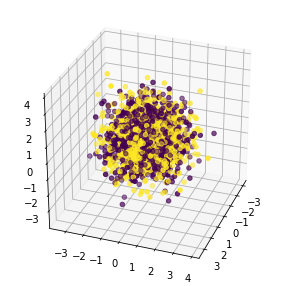

In [43]:
# Visualize Hypercube 

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111,projection = '3d')
X_1 = X_train[:,0] 
X_2 = X_train[:,1]
X_3 = X_train[:,2]
ax.scatter(X_1, X_2, X_3, c = y_train) 
cmaps = 'magma' 
ax.view_init(30,20)


In [77]:
# Performing LDA

dimension=[2,5,15]
for i in dimension:
    lda = LinearDiscriminantAnalysis(n_components = i)
    scoring = ['accuracy', 'precision_macro', 'recall_macro',  'f1_macro']
    scores = cross_validate(lda, X_train, y_train, scoring = scoring, cv = 5)
    print('{}D-LDA'.format(i))
    print('Fit Time', scores['fit_time'].mean().round(3))
    print('Score Time', scores['score_time'].mean().round(3))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
    print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
    print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
    print("f1-score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
    print('---')
    print(scores)
    
    '''f, axes = plt.subplots( figsize = (7, 5), sharex = True)
    axes.set_title('Histogram of Scores Performed by the 2D LDA')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    sns.distplot(scores_2DLDA['test_accuracy'])'''
       
    


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(500, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(500, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, sett

2D-LDA
Fit Time 0.211
Score Time 0.004
Accuracy: 0.55 (+/- 0.05)
Precision: 0.55 (+/- 0.05)
Recall: 0.55 (+/- 0.05)
f1-score: 0.55 (+/- 0.05)
---
{'fit_time': array([0.24235153, 0.22440934, 0.1924839 , 0.1815145 , 0.21243215]), 'score_time': array([0.00398874, 0.00298214, 0.00299239, 0.00299168, 0.00598431]), 'test_accuracy': array([0.5425, 0.5625, 0.5075, 0.575 , 0.55  ]), 'test_precision_macro': array([0.54250956, 0.56250156, 0.5075092 , 0.57548309, 0.55002001]), 'test_recall_macro': array([0.5425, 0.5625, 0.5075, 0.575 , 0.55  ]), 'test_f1_macro': array([0.54247426, 0.56249727, 0.50734913, 0.57431891, 0.549955  ])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(500, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(500, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, sett

5D-LDA
Fit Time 0.235
Score Time 0.005
Accuracy: 0.55 (+/- 0.05)
Precision: 0.55 (+/- 0.05)
Recall: 0.55 (+/- 0.05)
f1-score: 0.55 (+/- 0.05)
---
{'fit_time': array([0.2333765 , 0.22240376, 0.28325009, 0.22140837, 0.21542478]), 'score_time': array([0.00797963, 0.00299215, 0.0059762 , 0.00398898, 0.00498676]), 'test_accuracy': array([0.5425, 0.5625, 0.5075, 0.575 , 0.55  ]), 'test_precision_macro': array([0.54250956, 0.56250156, 0.5075092 , 0.57548309, 0.55002001]), 'test_recall_macro': array([0.5425, 0.5625, 0.5075, 0.575 , 0.55  ]), 'test_f1_macro': array([0.54247426, 0.56249727, 0.50734913, 0.57431891, 0.549955  ])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(500, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(500, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, sett

15D-LDA
Fit Time 0.244
Score Time 0.005
Accuracy: 0.55 (+/- 0.05)
Precision: 0.55 (+/- 0.05)
Recall: 0.55 (+/- 0.05)
f1-score: 0.55 (+/- 0.05)
---
{'fit_time': array([0.24733829, 0.20046186, 0.32911968, 0.2024579 , 0.24235153]), 'score_time': array([0.00398946, 0.00299215, 0.00299239, 0.00698328, 0.0089767 ]), 'test_accuracy': array([0.5425, 0.5625, 0.5075, 0.575 , 0.55  ]), 'test_precision_macro': array([0.54250956, 0.56250156, 0.5075092 , 0.57548309, 0.55002001]), 'test_recall_macro': array([0.5425, 0.5625, 0.5075, 0.575 , 0.55  ]), 'test_f1_macro': array([0.54247426, 0.56249727, 0.50734913, 0.57431891, 0.549955  ])}


In [80]:
# Performing SVM with different kernels

models=[]
models.append(("Linear-SVM", SVC(kernel = 'linear')))
models.append(("RBF-SVM", SVC(kernel = 'rbf')))
models.append(("Polynomial-SVM", SVC(kernel = 'poly')))
models.append(("Sigmoid-SVM", SVC(kernel = 'sigmoid')))
models.append(("Nonlinear-SVM", svm.NuSVC(gamma='auto')))
 
for name, model in models:
    
    scoring = ['accuracy', 'precision_macro', 'recall_macro',  'f1_macro']        
    scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
    print(name)
    print('Fit Time', scores['fit_time'].mean().round(3))
    print('Score Time', scores['score_time'].mean().round(3))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
    print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
    print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
    print("f1-score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
    print('---')
    print(scores)
    '''f, axes = plt.subplots( figsize = (7, 5), sharex = True)
    axes.set_title('Histogram of Scores Performed by the SVM with Linear Kernel')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    sns.distplot(scores['test_accuracy'])'''


Linear-SVM
Fit Time 23.457
Score Time 0.938
Accuracy: 0.54 (+/- 0.04)
Precision: 0.54 (+/- 0.04)
Recall: 0.54 (+/- 0.04)
f1-score: 0.54 (+/- 0.04)
---
{'fit_time': array([22.7558794 , 28.27191973, 25.10292268, 19.68410087, 21.47027087]), 'score_time': array([0.99733329, 0.88760018, 0.82293677, 1.07312965, 0.90897918]), 'test_accuracy': array([0.54  , 0.5375, 0.5025, 0.5575, 0.5525]), 'test_precision_macro': array([0.54068762, 0.53765911, 0.50250056, 0.55767447, 0.55260653]), 'test_recall_macro': array([0.54  , 0.5375, 0.5025, 0.5575, 0.5525]), 'test_f1_macro': array([0.53804825, 0.53701097, 0.50247201, 0.55716511, 0.55227334])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

RBF-SVM
Fit Time 1.58
Score Time 1.505
Accuracy: 0.58 (+/- 0.05)
Precision: 0.59 (+/- 0.05)
Recall: 0.58 (+/- 0.05)
f1-score: 0.58 (+/- 0.05)
---
{'fit_time': array([1.53290081, 1.61991143, 1.56908703, 1.56657934, 1.61003494]), 'score_time': array([1.61283851, 1.49503183, 1.46260881, 1.44104695, 1.51498008]), 'test_accuracy': array([0.57  , 0.615 , 0.5625, 0.61  , 0.5675]), 'test_precision_macro': array([0.57      , 0.61528822, 0.56250156, 0.610011  , 0.56754221]), 'test_recall_macro': array([0.57  , 0.615 , 0.5625, 0.61  , 0.5675]), 'test_f1_macro': array([0.57      , 0.61475922, 0.56249727, 0.60999025, 0.56743241])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Polynomial-SVM
Fit Time 1.554
Score Time 1.464
Accuracy: 0.61 (+/- 0.04)
Precision: 0.61 (+/- 0.05)
Recall: 0.61 (+/- 0.04)
f1-score: 0.60 (+/- 0.03)
---
{'fit_time': array([1.58675313, 1.55314803, 1.59171104, 1.51275659, 1.52791023]), 'score_time': array([1.49359536, 1.43453145, 1.40281582, 1.46212077, 1.52688622]), 'test_accuracy': array([0.585 , 0.625 , 0.5825, 0.625 , 0.6125]), 'test_precision_macro': array([0.58503401, 0.63828963, 0.58611916, 0.63482904, 0.61743521]), 'test_recall_macro': array([0.585 , 0.625 , 0.5825, 0.625 , 0.6125]), 'test_f1_macro': array([0.5849585 , 0.61576885, 0.57806707, 0.61803876, 0.6083856 ])}


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Sigmoid-SVM
Fit Time 1.453
Score Time 1.246
Accuracy: 0.56 (+/- 0.05)
Precision: 0.56 (+/- 0.05)
Recall: 0.56 (+/- 0.05)
f1-score: 0.56 (+/- 0.05)
---
{'fit_time': array([1.49026918, 1.53788686, 1.47804642, 1.43120742, 1.32947659]), 'score_time': array([1.28860664, 1.28456569, 1.1519196 , 1.28754926, 1.21571732]), 'test_accuracy': array([0.5675, 0.595 , 0.53  , 0.5875, 0.5375]), 'test_precision_macro': array([0.56750169, 0.5950095 , 0.530003  , 0.58787126, 0.53750844]), 'test_recall_macro': array([0.5675, 0.595 , 0.53  , 0.5875, 0.5375]), 'test_f1_macro': array([0.5674973 , 0.59498987, 0.52998825, 0.58706384, 0.53747398])}
Nonlinear-SVM
Fit Time 1.541
Score Time 1.423
Accuracy: 0.57 (+/- 0.07)
Precision: 0.57 (+/- 0.07)
Recall: 0.57 (+/- 0.07)
f1-score: 0.57 (+/- 0.07)
---
{'fit_time': array([1.58067226, 1.52096415, 1.5608573 , 1.51594687, 1.52894258]), 'score_time': array([1.4401505 , 1.43612933, 1.41722131, 1.41325378, 1.40723753]), 'test_accuracy': array([0.565 , 0.6025, 0.535 , 0.6

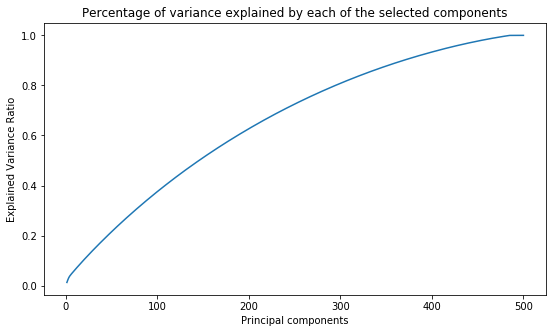

In [94]:
# Performing PCA
pca = PCA(n_components = 500, svd_solver = 'randomized',  whiten = True).fit(X_train)
X_train_pca = pca.transform(X_train)
dimension=np.array(range(1,501))
variance=(pca.explained_variance_ratio_)
variance_cum=np.cumsum(variance)
plt.figure(figsize=(9, 5))
plt.plot(dimension,variance_cum)
plt.title('Percentage of variance explained by each of the selected components')
plt.xlabel('Principal components')
plt.ylabel('Explained Variance Ratio')
plt.show()

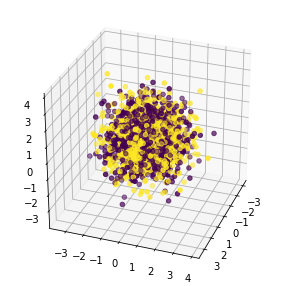

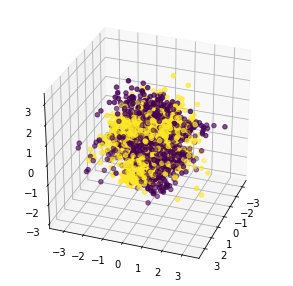

In [71]:

# Visualize data points on 3D-Hypercube 

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111,projection = '3d')

X_1 = X_train[:,0] 
X_2 = X_train[:,1]
X_3 = X_train[:,2]
ax.scatter(X_1, X_2, X_3, c = y_train) 
cmaps = 'magma' 
ax.view_init(30,20)

pca = PCA(n_components = 3, svd_solver = 'randomized',  whiten = True).fit(X_train)
X_train_pca = pca.transform(X_train)

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111,projection = '3d')

X_1 = X_train_pca[:,0] 
X_2 = X_train_pca[:,1]
X_3 = X_train_pca[:,2]
ax.scatter(X_1, X_2, X_3, c = y_train) 
cmaps = 'magma' 
ax.view_init(30,20)


Text(0, 0.5, 'Second Principal Component')

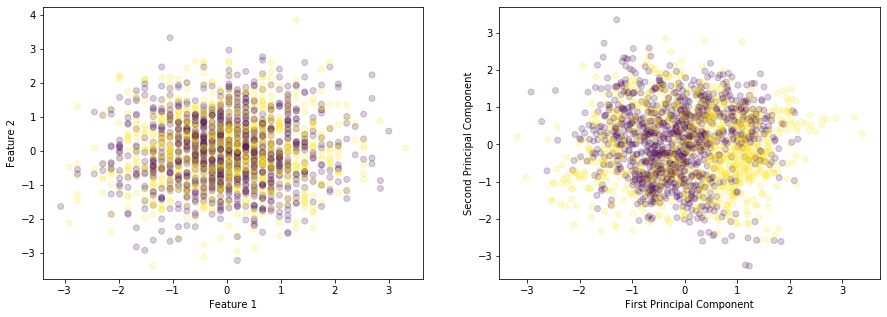

In [97]:
# Performing 2D-PCA 

pca = PCA(n_components = 2, svd_solver = 'randomized',  whiten = True).fit(X_train)
X_train_pca = pca.transform(X_train)
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.scatter(X_train[:,0], X_train[:,1], alpha=0.2, c=y_train, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
fig.add_subplot(1,2,2)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], alpha=0.2, c=y_train, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [81]:
# Performing SVM with different kernels after applying PCA

dimension=[2,5,15,20,30,50]
models=[]
models.append(("Linear", SVC(kernel = 'linear')))
models.append(("RBF", SVC(kernel = 'rbf')))
models.append(("Polynomial", SVC(kernel = 'poly')))
models.append(("Sigmoid", SVC(kernel = 'sigmoid')))
models.append(("Nonlinear-SVM", svm.NuSVC(gamma='auto')))
for i in dimension:    
    pca = PCA(n_components = i, svd_solver = 'randomized',  whiten = True).fit(X_train)
    X_train_pca = pca.transform(X_train)
    for name, model in models: 
        scoring = ['accuracy', 'precision_macro', 'recall_macro',  'f1_macro']        
        scores = cross_validate(model, X_train_pca, y_train, scoring = scoring, cv = 5)
        print('Performing SVM with {} kernel after applying {}D-PCA'.format(name,i))
        print('Fit Time', scores['fit_time'].mean().round(3))
        print('Score Time', scores['score_time'].mean().round(3))
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
        print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
        print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))
        print("f1-score: %0.2f (+/- %0.2f)" % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))
        print(scores)
        print('---')
'''f, axes = plt.subplots( figsize = (7, 5), sharex = True)
axes.set_title('Histogram of Scores Performed by the SVM with Linear Kernel After Applying 2D-PCA')
plt.xlabel('Scores')
plt.ylabel('Frequency')
sns.distplot(scores_2DPCA_SVM_linear['test_accuracy'])'''

Performing SVM with Linear kernel after applying 2D-PCA
Fit Time 0.034
Score Time 0.014
Accuracy: 0.58 (+/- 0.03)
Precision: 0.58 (+/- 0.03)
Recall: 0.58 (+/- 0.03)
f1-score: 0.58 (+/- 0.03)
{'fit_time': array([0.03390861, 0.03590417, 0.03490615, 0.03191447, 0.0349071 ]), 'score_time': array([0.01396298, 0.01496005, 0.01396298, 0.01396275, 0.01296473]), 'test_accuracy': array([0.5575, 0.565 , 0.595 , 0.5875, 0.5975]), 'test_precision_macro': array([0.55757052, 0.56717652, 0.5959596 , 0.58787126, 0.59750244]), 'test_recall_macro': array([0.5575, 0.565 , 0.595 , 0.5875, 0.5975]), 'test_f1_macro': array([0.55736444, 0.56144773, 0.59398496, 0.58706384, 0.59749748])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with RBF kernel after applying 2D-PCA
Fit Time 0.045
Score Time 0.028
Accuracy: 0.65 (+/- 0.02)
Precision: 0.67 (+/- 0.02)
Recall: 0.65 (+/- 0.02)
f1-score: 0.64 (+/- 0.03)
{'fit_time': array([0.04288578, 0.04188848, 0.04288578, 0.05086803, 0.0449121 ]), 'score_time': array([0.02692723, 0.02592993, 0.02792501, 0.02991652, 0.02692938]), 'test_accuracy': array([0.65  , 0.6475, 0.6375, 0.6675, 0.6375]), 'test_precision_macro': array([0.6671123 , 0.67017104, 0.64483213, 0.68120352, 0.66610794]), 'test_recall_macro': array([0.65  , 0.6475, 0.6375, 0.6675, 0.6375]), 'test_f1_macro': array([0.6408046 , 0.63535504, 0.6328533 , 0.66109253, 0.62118986])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with Polynomial kernel after applying 2D-PCA
Fit Time 0.076
Score Time 0.025
Accuracy: 0.61 (+/- 0.04)
Precision: 0.64 (+/- 0.05)
Recall: 0.61 (+/- 0.04)
f1-score: 0.59 (+/- 0.04)
{'fit_time': array([0.05586386, 0.06579089, 0.11569333, 0.08078766, 0.06083798]), 'score_time': array([0.02196479, 0.01894832, 0.03889394, 0.02492905, 0.0199461 ]), 'test_accuracy': array([0.63  , 0.585 , 0.63  , 0.6   , 0.6175]), 'test_precision_macro': array([0.6547619 , 0.60781329, 0.65948963, 0.62020676, 0.6646177 ]), 'test_recall_macro': array([0.63  , 0.585 , 0.63  , 0.6   , 0.6175]), 'test_f1_macro': array([0.61458333, 0.56182029, 0.61206784, 0.58245257, 0.58802028])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with Sigmoid kernel after applying 2D-PCA
Fit Time 0.064
Score Time 0.035
Accuracy: 0.47 (+/- 0.04)
Precision: 0.47 (+/- 0.04)
Recall: 0.47 (+/- 0.04)
f1-score: 0.47 (+/- 0.04)
{'fit_time': array([0.04487872, 0.04890013, 0.12463737, 0.05285859, 0.04787111]), 'score_time': array([0.03191447, 0.03291225, 0.03989196, 0.03490663, 0.03294587]), 'test_accuracy': array([0.4875, 0.45  , 0.45  , 0.4825, 0.4975]), 'test_precision_macro': array([0.48738616, 0.44967794, 0.44997999, 0.48249956, 0.49749994]), 'test_recall_macro': array([0.4875, 0.45  , 0.45  , 0.4825, 0.4975]), 'test_f1_macro': array([0.48634106, 0.44911859, 0.44994499, 0.48249677, 0.49749686])}
---
Performing SVM with Nonlinear-SVM kernel after applying 2D-PCA
Fit Time 0.084
Score Time 0.025
Accuracy: 0.51 (+/- 0.05)
Precision: 0.51 (+/- 0.05)
Recall: 0.51 (+/- 0.05)
f1-score: 0.51 (+/- 0.05)
{'fit_time': array([0.09776521, 0.06080675, 0.07976007, 0.088763  , 0.09072638]), 'score_time': array([0.02393961, 0.02496004,

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with RBF kernel after applying 5D-PCA
Fit Time 0.044
Score Time 0.028
Accuracy: 0.81 (+/- 0.03)
Precision: 0.81 (+/- 0.04)
Recall: 0.81 (+/- 0.03)
f1-score: 0.81 (+/- 0.03)
{'fit_time': array([0.04487944, 0.04485369, 0.04189324, 0.0489018 , 0.03986311]), 'score_time': array([0.02795172, 0.02795196, 0.03088427, 0.02592731, 0.02493215]), 'test_accuracy': array([0.825 , 0.8075, 0.8325, 0.8   , 0.785 ]), 'test_precision_macro': array([0.83149735, 0.8088047 , 0.83438089, 0.80147724, 0.78787879]), 'test_recall_macro': array([0.825 , 0.8075, 0.8325, 0.8   , 0.785 ]), 'test_f1_macro': array([0.82413828, 0.80729646, 0.83226412, 0.7997547 , 0.78446115])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with Polynomial kernel after applying 5D-PCA
Fit Time 0.048
Score Time 0.021
Accuracy: 0.66 (+/- 0.02)
Precision: 0.66 (+/- 0.02)
Recall: 0.66 (+/- 0.02)
f1-score: 0.66 (+/- 0.02)
{'fit_time': array([0.03988481, 0.05385756, 0.05089426, 0.05089498, 0.04683423]), 'score_time': array([0.01994586, 0.02194142, 0.0239346 , 0.02194977, 0.0179522 ]), 'test_accuracy': array([0.6625, 0.66  , 0.675 , 0.6625, 0.6425]), 'test_precision_macro': array([0.66551654, 0.66025641, 0.67507003, 0.66269931, 0.64648814]), 'test_recall_macro': array([0.6625, 0.66  , 0.675 , 0.6625, 0.6425]), 'test_f1_macro': array([0.66095523, 0.65986395, 0.6749675 , 0.66239661, 0.64005009])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Performing SVM with Sigmoid kernel after applying 5D-PCA
Fit Time 0.051
Score Time 0.039
Accuracy: 0.40 (+/- 0.04)
Precision: 0.40 (+/- 0.04)
Recall: 0.40 (+/- 0.04)
f1-score: 0.40 (+/- 0.04)
{'fit_time': array([0.04587698, 0.04787946, 0.05385661, 0.04883695, 0.05781889]), 'score_time': array([0.03590417, 0.04088283, 0.03892875, 0.037925  , 0.04191566]), 'test_accuracy': array([0.3775, 0.4125, 0.42  , 0.39  , 0.425 ]), 'test_precision_macro': array([0.37698024, 0.41232245, 0.41987179, 0.38990091, 0.4249925 ]), 'test_recall_macro': array([0.3775, 0.4125, 0.42  , 0.39  , 0.425 ]), 'test_f1_macro': array([0.37684179, 0.41220243, 0.41976791, 0.38986272, 0.42498562])}
---
Performing SVM with Nonlinear-SVM kernel after applying 5D-PCA
Fit Time 0.055
Score Time 0.024
Accuracy: 0.82 (+/- 0.04)
Precision: 0.82 (+/- 0.04)
Recall: 0.82 (+/- 0.04)
f1-score: 0.82 (+/- 0.04)
{'fit_time': array([0.05884576, 0.05383301, 0.05484653, 0.05284977, 0.05482531]), 'score_time': array([0.02393866, 0.02395868,

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with RBF kernel after applying 15D-PCA
Fit Time 0.075
Score Time 0.054
Accuracy: 0.68 (+/- 0.03)
Precision: 0.68 (+/- 0.03)
Recall: 0.68 (+/- 0.03)
f1-score: 0.67 (+/- 0.03)
{'fit_time': array([0.07781911, 0.07676768, 0.07479858, 0.07277417, 0.0738039 ]), 'score_time': array([0.05485606, 0.05388474, 0.0518651 , 0.05588126, 0.05382442]), 'test_accuracy': array([0.6725, 0.7025, 0.6675, 0.655 , 0.6775]), 'test_precision_macro': array([0.67481189, 0.70571429, 0.66821069, 0.65538847, 0.6777177 ]), 'test_recall_macro': array([0.6725, 0.7025, 0.6675, 0.655 , 0.6775]), 'test_f1_macro': array([0.67141361, 0.70133333, 0.66714843, 0.65478424, 0.6774012 ])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with Polynomial kernel after applying 15D-PCA
Fit Time 0.066
Score Time 0.037
Accuracy: 0.61 (+/- 0.04)
Precision: 0.61 (+/- 0.04)
Recall: 0.61 (+/- 0.04)
f1-score: 0.61 (+/- 0.04)
{'fit_time': array([0.06382942, 0.06682229, 0.06583166, 0.06984091, 0.06482124]), 'score_time': array([0.03490663, 0.0409174 , 0.03690147, 0.03590894, 0.03687477]), 'test_accuracy': array([0.5975, 0.6375, 0.635 , 0.58  , 0.615 ]), 'test_precision_macro': array([0.59761958, 0.63758599, 0.6350135 , 0.58003201, 0.61668019]), 'test_recall_macro': array([0.5975, 0.6375, 0.635 , 0.58  , 0.615 ]), 'test_f1_macro': array([0.5973767 , 0.63744335, 0.63499087, 0.579958  , 0.61360899])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with Sigmoid kernel after applying 15D-PCA
Fit Time 0.08
Score Time 0.066
Accuracy: 0.56 (+/- 0.03)
Precision: 0.56 (+/- 0.03)
Recall: 0.56 (+/- 0.03)
f1-score: 0.56 (+/- 0.03)
{'fit_time': array([0.07882023, 0.08278418, 0.08207345, 0.07882142, 0.07779431]), 'score_time': array([0.06482482, 0.06578946, 0.06379557, 0.06981134, 0.06482506]), 'test_accuracy': array([0.5325, 0.5825, 0.555 , 0.56  , 0.565 ]), 'test_precision_macro': array([0.53256595, 0.58453085, 0.55527083, 0.56021678, 0.56532007]), 'test_recall_macro': array([0.5325, 0.5825, 0.555 , 0.56  , 0.565 ]), 'test_f1_macro': array([0.53226321, 0.57997724, 0.55445421, 0.55960364, 0.56446647])}
---
Performing SVM with Nonlinear-SVM kernel after applying 15D-PCA
Fit Time 0.105
Score Time 0.049
Accuracy: 0.68 (+/- 0.04)
Precision: 0.68 (+/- 0.04)
Recall: 0.68 (+/- 0.04)
f1-score: 0.68 (+/- 0.04)
{'fit_time': array([0.1027565 , 0.11070633, 0.10173583, 0.10073376, 0.10867834]), 'score_time': array([0.04986167, 0.04986429

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with RBF kernel after applying 20D-PCA
Fit Time 0.088
Score Time 0.066
Accuracy: 0.64 (+/- 0.05)
Precision: 0.64 (+/- 0.06)
Recall: 0.64 (+/- 0.05)
f1-score: 0.64 (+/- 0.05)
{'fit_time': array([0.08467937, 0.09236407, 0.08458138, 0.07719088, 0.10024738]), 'score_time': array([0.06248474, 0.06090355, 0.06251574, 0.07649922, 0.06898856]), 'test_accuracy': array([0.6225, 0.665 , 0.6   , 0.635 , 0.6725]), 'test_precision_macro': array([0.62252757, 0.67052501, 0.60171905, 0.63521635, 0.67260788]), 'test_recall_macro': array([0.6225, 0.665 , 0.6   , 0.635 , 0.6725]), 'test_f1_macro': array([0.62247876, 0.66226434, 0.59830283, 0.63485394, 0.67244882])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with Polynomial kernel after applying 20D-PCA
Fit Time 0.077
Score Time 0.045
Accuracy: 0.60 (+/- 0.03)
Precision: 0.60 (+/- 0.03)
Recall: 0.60 (+/- 0.03)
f1-score: 0.60 (+/- 0.03)
{'fit_time': array([0.08423543, 0.07479739, 0.07081079, 0.07679486, 0.07779145]), 'score_time': array([0.04760504, 0.04487872, 0.04288507, 0.04587746, 0.04192185]), 'test_accuracy': array([0.5975, 0.6225, 0.59  , 0.58  , 0.595 ]), 'test_precision_macro': array([0.59805154, 0.62637008, 0.59415211, 0.5805153 , 0.59534324]), 'test_recall_macro': array([0.5975, 0.6225, 0.59  , 0.58  , 0.595 ]), 'test_f1_macro': array([0.59693319, 0.61958747, 0.58542936, 0.57932692, 0.59463517])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with Sigmoid kernel after applying 20D-PCA
Fit Time 0.092
Score Time 0.075
Accuracy: 0.58 (+/- 0.04)
Precision: 0.58 (+/- 0.04)
Recall: 0.58 (+/- 0.04)
f1-score: 0.58 (+/- 0.04)
{'fit_time': array([0.08875203, 0.09574389, 0.09271741, 0.08876252, 0.09473825]), 'score_time': array([0.0738368 , 0.07679486, 0.0718081 , 0.07580566, 0.07480025]), 'test_accuracy': array([0.555 , 0.615 , 0.57  , 0.5875, 0.5775]), 'test_precision_macro': array([0.55513784, 0.61729906, 0.570007  , 0.58750219, 0.57750194]), 'test_recall_macro': array([0.555 , 0.615 , 0.57  , 0.5875, 0.5775]), 'test_f1_macro': array([0.5547217 , 0.61310421, 0.56998925, 0.58749742, 0.57749736])}
---
Performing SVM with Nonlinear-SVM kernel after applying 20D-PCA
Fit Time 0.124
Score Time 0.059
Accuracy: 0.63 (+/- 0.08)
Precision: 0.63 (+/- 0.08)
Recall: 0.63 (+/- 0.08)
f1-score: 0.63 (+/- 0.08)
{'fit_time': array([0.1226716 , 0.125664  , 0.12367034, 0.12369943, 0.1226716 ]), 'score_time': array([0.06083727, 0.0578448

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with RBF kernel after applying 30D-PCA
Fit Time 0.115
Score Time 0.089
Accuracy: 0.61 (+/- 0.03)
Precision: 0.61 (+/- 0.03)
Recall: 0.61 (+/- 0.03)
f1-score: 0.61 (+/- 0.03)
{'fit_time': array([0.1097343 , 0.11369538, 0.1166544 , 0.11768603, 0.11871576]), 'score_time': array([0.08677173, 0.08580732, 0.09075713, 0.09075713, 0.08975911]), 'test_accuracy': array([0.61  , 0.6125, 0.5975, 0.605 , 0.6375]), 'test_precision_macro': array([0.61      , 0.61564853, 0.59820956, 0.60516827, 0.63766864]), 'test_recall_macro': array([0.61  , 0.6125, 0.5975, 0.605 , 0.6375]), 'test_f1_macro': array([0.61      , 0.6098445 , 0.59677167, 0.60484194, 0.63738895])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with Polynomial kernel after applying 30D-PCA
Fit Time 0.103
Score Time 0.07
Accuracy: 0.60 (+/- 0.03)
Precision: 0.60 (+/- 0.03)
Recall: 0.60 (+/- 0.03)
f1-score: 0.60 (+/- 0.03)
{'fit_time': array([0.10275769, 0.11768365, 0.09677291, 0.09973335, 0.09674191]), 'score_time': array([0.07277417, 0.06881595, 0.06978202, 0.07183886, 0.06881547]), 'test_accuracy': array([0.585 , 0.6075, 0.5825, 0.585 , 0.6225]), 'test_precision_macro': array([0.585     , 0.60771813, 0.58296669, 0.5850085 , 0.62414177]), 'test_recall_macro': array([0.585 , 0.6075, 0.5825, 0.585 , 0.6225]), 'test_f1_macro': array([0.585     , 0.6073012 , 0.58191206, 0.58498962, 0.62124775])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with Sigmoid kernel after applying 30D-PCA
Fit Time 0.125
Score Time 0.117
Accuracy: 0.59 (+/- 0.05)
Precision: 0.59 (+/- 0.05)
Recall: 0.59 (+/- 0.05)
f1-score: 0.59 (+/- 0.04)
{'fit_time': array([0.11472487, 0.13859916, 0.12167454, 0.12267113, 0.12767887]), 'score_time': array([0.09674311, 0.16957903, 0.09973431, 0.10073042, 0.11964464]), 'test_accuracy': array([0.56  , 0.6225, 0.61  , 0.585 , 0.5775]), 'test_precision_macro': array([0.56      , 0.62361563, 0.61039743, 0.58530711, 0.57754847]), 'test_recall_macro': array([0.56  , 0.6225, 0.61  , 0.585 , 0.5775]), 'test_f1_macro': array([0.56      , 0.62164634, 0.60964868, 0.58462616, 0.57743397])}
---
Performing SVM with Nonlinear-SVM kernel after applying 30D-PCA
Fit Time 0.168
Score Time 0.095
Accuracy: 0.62 (+/- 0.06)
Precision: 0.62 (+/- 0.06)
Recall: 0.62 (+/- 0.06)
f1-score: 0.62 (+/- 0.06)
{'fit_time': array([0.1615665 , 0.14954209, 0.15854096, 0.21687412, 0.15458655]), 'score_time': array([0.08979154, 0.0877652

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with RBF kernel after applying 50D-PCA
Fit Time 0.16
Score Time 0.133
Accuracy: 0.60 (+/- 0.02)
Precision: 0.60 (+/- 0.02)
Recall: 0.60 (+/- 0.02)
f1-score: 0.60 (+/- 0.02)
{'fit_time': array([0.16256571, 0.15957284, 0.15861034, 0.15957046, 0.16157031]), 'score_time': array([0.13467026, 0.13162065, 0.13364244, 0.13164806, 0.133641  ]), 'test_accuracy': array([0.5925, 0.61  , 0.585 , 0.6   , 0.6125]), 'test_precision_macro': array([0.59278066, 0.61160714, 0.58521303, 0.60004002, 0.61257036]), 'test_recall_macro': array([0.5925, 0.61  , 0.585 , 0.6   , 0.6125]), 'test_f1_macro': array([0.59219159, 0.60859093, 0.58474046, 0.59996   , 0.61243944])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with Polynomial kernel after applying 50D-PCA
Fit Time 0.141
Score Time 0.112
Accuracy: 0.59 (+/- 0.08)
Precision: 0.59 (+/- 0.08)
Recall: 0.59 (+/- 0.08)
f1-score: 0.59 (+/- 0.08)
{'fit_time': array([0.14162183, 0.14059711, 0.13962674, 0.14035463, 0.14059305]), 'score_time': array([0.11072993, 0.11170149, 0.11170077, 0.1126976 , 0.1147244 ]), 'test_accuracy': array([0.53  , 0.6225, 0.5625, 0.5975, 0.6425]), 'test_precision_macro': array([0.53010839, 0.62477401, 0.56262682, 0.59769784, 0.64293237]), 'test_recall_macro': array([0.53  , 0.6225, 0.5625, 0.5975, 0.6425]), 'test_f1_macro': array([0.52957662, 0.62077214, 0.5622784 , 0.59729613, 0.64222944])}
---


C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Performing SVM with Sigmoid kernel after applying 50D-PCA
Fit Time 0.163
Score Time 0.14
Accuracy: 0.60 (+/- 0.04)
Precision: 0.60 (+/- 0.04)
Recall: 0.60 (+/- 0.04)
f1-score: 0.60 (+/- 0.04)
{'fit_time': array([0.15954304, 0.16556144, 0.16156912, 0.16156793, 0.16456199]), 'score_time': array([0.13965321, 0.14162111, 0.13759923, 0.1406548 , 0.14062357]), 'test_accuracy': array([0.565 , 0.61  , 0.5925, 0.5975, 0.62  ]), 'test_precision_macro': array([0.56502601, 0.61253197, 0.59353118, 0.59791369, 0.6201081 ]), 'test_recall_macro': array([0.565 , 0.61  , 0.5925, 0.5975, 0.62  ]), 'test_f1_macro': array([0.5649565 , 0.60779384, 0.59137372, 0.59707441, 0.61991448])}
---
Performing SVM with Nonlinear-SVM kernel after applying 50D-PCA
Fit Time 0.192
Score Time 0.149
Accuracy: 0.58 (+/- 0.04)
Precision: 0.58 (+/- 0.04)
Recall: 0.58 (+/- 0.04)
f1-score: 0.58 (+/- 0.04)
{'fit_time': array([0.20197678, 0.19048953, 0.19245434, 0.18102717, 0.19260764]), 'score_time': array([0.14165282, 0.13463998

"f, axes = plt.subplots( figsize = (7, 5), sharex = True)\naxes.set_title('Histogram of Scores Performed by the SVM with Linear Kernel After Applying 2D-PCA')\nplt.xlabel('Scores')\nplt.ylabel('Frequency')\nsns.distplot(scores_2DPCA_SVM_linear['test_accuracy'])"